In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer # Handling missing values
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('./Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [6]:
df.drop('Cabin' ,axis=1 ,inplace=True)

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
df['Sex'] = df['Sex'].map({'male':1 ,'female':0})

In [9]:
df = pd.get_dummies(df,columns=['Embarked'],drop_first=True)

In [10]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,False,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,False,True
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,False,False


In [11]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

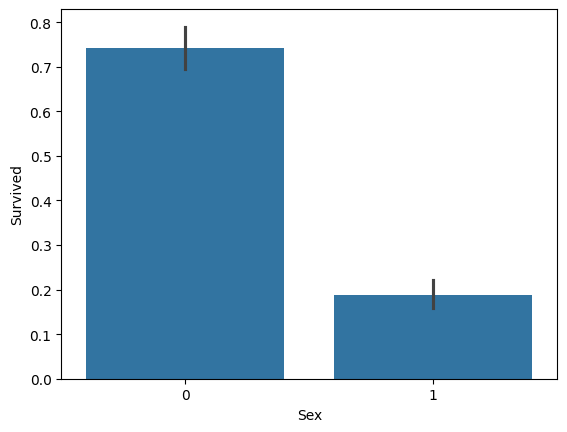

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(x='Sex',y='Survived', data=df)
plt.show()

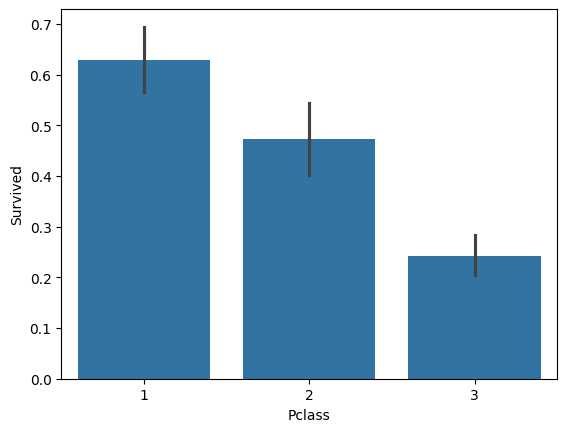

In [13]:
sns.barplot(x='Pclass',y='Survived',data=df)
plt.show()

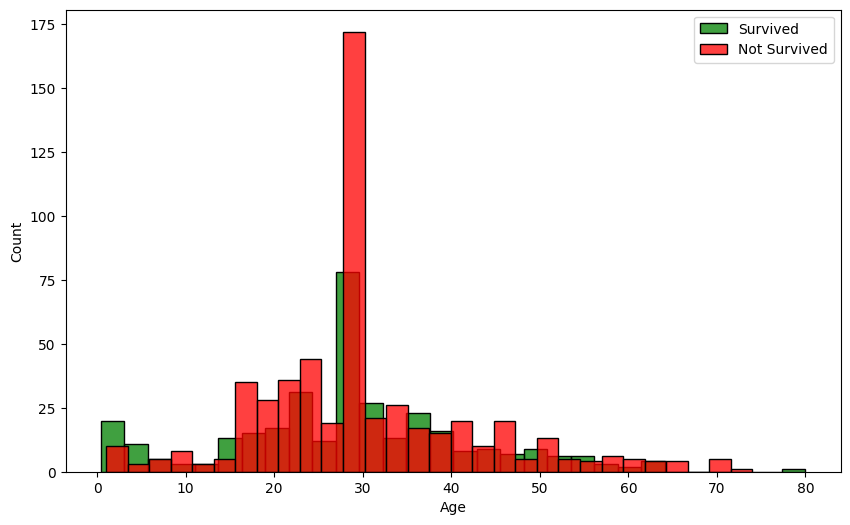

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Survived'] == 1]['Age'],bins=30,color='green',label='Survived',kde=False)
sns.histplot(df[df['Survived'] == 0]['Age'],bins=30,color='red',label='Not Survived',kde=False)
plt.legend()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

x = df.drop('Survived',axis=1)
y = df['Survived']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report

lr = LogisticRegression()
lr.fit(x_train, y_train)

# Make predictions and evaluate
y_pred_lr = lr.predict(x_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.7988826815642458


C:\Users\DINESH P SUTHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
dt = DecisionTreeClassifier(max_depth=5,random_state=42)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

print('Decision Tree Accuracy:', accuracy_score(y_test,y_pred))

Decision Tree Accuracy: 0.7988826815642458


In [18]:
print('confusion matrix(logistic regression):\n',confusion_matrix(y_test,y_pred_lr))

confusion matrix(logistic regression):
 [[89 16]
 [20 54]]


In [19]:
print('confusion matrix(decision tree):\n',confusion_matrix(y_test,y_pred))

confusion matrix(decision tree):
 [[95 10]
 [26 48]]


In [20]:
print('classification report(logistic regression):\n',classification_report(y_test,y_pred_lr))

classification report(logistic regression):
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [21]:
print('classification report(decision tree):\n',classification_report(y_test,y_pred))

classification report(decision tree):
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 5, 7, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 3, 'min_samples_split': 2}


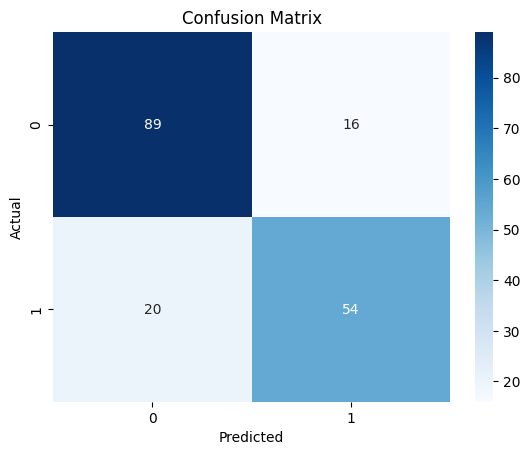

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_lr)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()